### Introduction

The goal of this notebook is to build from scratch a neural network for an image classficiation task.

This is to have a good grasp of deep learning concepts ..

## Plan

**1-** Prepare the dataset

**2-** Implementing the forward pass

**3-** Implementing the backwad pass

**4-** Evaluating the performance of the nn

**5-** Experiments with the nn parametres and how they affect the performances 

Some questions that we want to answer are : 

* Can we find some correlation between the variance in the dataset and the size of the neural network? 
* Is the bias part of the neurons important in the task?
* Does the activation function affects the value to be choosen for the learning rate

## 1-  Loading the dataset

In [5]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the loaded data
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Training labels shape:", y_train.shape)  # (60000,)
print("Test data shape:", x_test.shape)  # (10000, 28, 28)
print("Test labels shape:", y_test.shape)  # (10000,)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


##  2-  Visualizing the dataset

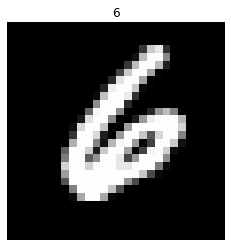

In [6]:
import matplotlib.pyplot as plt
import numpy as np

random_idx = np.random.randint(1000)

image = x_train[random_idx]
label = y_train[random_idx]


def visualize_image(image, label):
    plt.imshow(image, cmap='gray')  # Display the image
    plt.axis('off')  # Turn off the axes
    plt.title(label)
    plt.show()  # Show the image
    
visualize_image(image, label)

==> Each image is a **28*28** pixels, which gives a list of **784** elements

## 3- Implementing the forward pass

Our neural network, would be such that there is only one hidden layer with **300** neurons, and the output layer with **10**neurons

For now, the activations functions would be all linear, and in to generate the output we take the argmax.

Our loss function will be the Mean Squared Error, aka **MSE**

In [7]:
input_layer = image.flatten()

In [8]:
## Initializing the weights linking the input layer with the hidden layer

size_input_layer = len(input_layer) #784
size_hidden_layer = 300
size_output_layer = 10
print(len(input_layer))

def init_weights():
    weight_input_hidden = np.random.random((size_input_layer, size_hidden_layer))
    weight_hidden_output = np.random.random((size_hidden_layer, size_output_layer))
    
    return weight_input_hidden, weight_hidden_output

weight_input_hidden, weight_hidden_output = init_weights()
weights = weight_input_hidden, weight_hidden_output

784


In [9]:
# Hidden layer result
hidden_representation = np.dot(input_layer, weight_input_hidden)

# Min max normalization
mi = hidden_representation.min()
ma = hidden_representation.max()

# min max normalization
norm_hidden_representation = (hidden_representation - mi)/(ma-mi)

(300,)

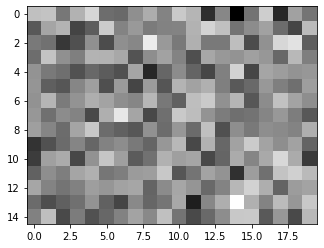

In [11]:
plt.imshow(norm_hidden_representation.reshape(15,20), cmap='gray')  # Display the image

In [12]:
## hidden output result 

ouput_result = np.dot(norm_hidden_representation, weight_hidden_output)
ouput_result.shape

(10,)

In [13]:
# Result of the forward pass
ouput_result.argmax()

1

In [31]:
# Defining the function that takes as an input the input layer(vector) and parameters and returns the predicted written number
def predict_number(input_layer, weights):
    size_input_layer = len(input_layer) #784
    size_hidden_layer = 300
    size_output_layer = 10
    
    weights = weight_input_hidden, weight_hidden_output

    hidden_representation = np.dot(input_layer, weight_input_hidden)
    mi = hidden_representation.min()
    ma = hidden_representation.max()

    # min max normalization
    norm_hidden_representation = (hidden_representation - mi)/(ma-mi)

    ouput_result = np.dot(norm_hidden_representation, weight_hidden_output)
    # Result of the forward pass
    result = ouput_result.argmax()
    return result


In [40]:
# Defining the function that takes as an input the input layer(vector) and parameters and returns the hidden representation and the output result
def forward_pass(input_layer, weights):
    size_input_layer = len(input_layer) #784
    size_hidden_layer = 300
    size_output_layer = 10
    
    weights = weight_input_hidden, weight_hidden_output
    
    hidden_representation = np.dot(input_layer, weight_input_hidden)
    mi = hidden_representation.min()
    ma = hidden_representation.max()

    # min max normalization
    norm_hidden_representation = (hidden_representation - mi)/(ma-mi)

    output_result = np.dot(norm_hidden_representation, weight_hidden_output)
    
    return hidden_representation, output_result

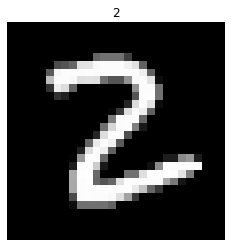

1

In [32]:
#Test
visualize_image(image, label)
predict_number(input_layer, weights)

## 4- Implementing the backward pass:

This section would modify the *input_hidden_weights* and *hidden_output_weights* in order to make better predictions.

The weights modifications would be based on the backpropagation algorithms

In [17]:
def MSE(predicted, desired):
    # This function takes as input numpy arrays and not lists
    diff = 1/2 * ((predicted - desired)**2).sum()
    return diff

In [43]:
def full_backward_pass(weights, image, label, lr = 0.01, lamda = 0.01):
    # We only modify the weights between the last and the penultimate layer
    # weights is a tuple of matrices : weight_input_hidden & weight_hidden_output

    size_hidden_layer = 300
    size_output_layer = 10

    # one hot encoding the label
    desired = np.zeros(size_output_layer)
    desired[int(label)] = 1

    weight_input_hidden, weight_hidden_output = weights
    new_weight_input_hidden, new_weight_hidden_output = weight_input_hidden.copy(), weight_hidden_output.copy()

    input_layer = image.flatten() # flattening the image

    hidden_representation, output_result = forward_pass(input_layer, (weight_input_hidden, weight_hidden_output)) # forward pass

    output_result =  tf.nn.softmax(output_result) # softmax operation

    delta_matrix = np.zeros((size_hidden_layer, size_output_layer))

    # gradient descent iteration # backward pass for the second layer
    for k in range(size_output_layer):
        for j in range(size_hidden_layer):
            delta = (output_result[k] - desired[k]) * hidden_representation[j] * (1 - output_result[k]) * output_result[k]
            new_weight_hidden_output[j][k] = (1-lamda) * new_weight_hidden_output[j][k] - lr*delta

            delta_matrix[j][k] = delta

    for j in range(size_hidden_layer):
        for i in range(size_input_layer):
            delta = np.sum(new_weight_hidden_output[j]* (delta_matrix[j]) * input_layer[i] / hidden_representation[j])
            new_weight_input_hidden[i][j] = (1-lamda) * new_weight_input_hidden[i][j] - lr*delta


    return new_weight_input_hidden, new_weight_hidden_output

In [20]:
# testing the backward pass 

# preparing the args
random_idx += 1 

weights = weight_input_hidden, weight_hidden_output
image = x_train[random_idx]; input_layer = image.flatten()
label = y_train[random_idx]

# one hot encoding
desired = np.zeros(size_output_layer)
desired[int(label)] = 1

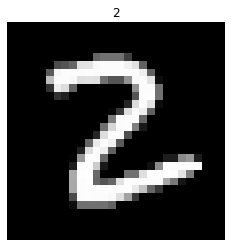

In [21]:
visualize_image(image, label)

In [22]:
# skip if you don't want to perform the backward pass
new_weight_input_hidden, new_weight_hidden_output = full_backward_pass(weights, image, label)

In [23]:
_, new_output = forward_pass(input_layer, new_weight_input_hidden, new_weight_hidden_output)
norm_new_output = np.array(tf.nn.softmax(new_output)) # transforming the logits to probs
MSE(norm_new_output, desired)

3.4136043127399244e-84

In [24]:
_, old_output = forward_pass(input_layer, weight_input_hidden, weight_hidden_output)
norm_old_output = np.array(tf.nn.softmax(old_output))
MSE(norm_old_output, desired)

0.6459272434780764

In [25]:
new_output

array([ -566.43265672, -2077.36766018,   165.18731242,    68.2126297 ,
          68.93283493, -1460.00896443,    68.84528575,    68.73770625,
          53.12113376,    45.20348252])

## 5 - Training and Validation loop:

In [46]:
from tqdm import tqdm

def train(weights, train_data, val_data = None):
    weight_input_hidden, weight_hidden_output = weights
    images, labels = train_data
    
    for idx, (image, label) in tqdm(enumerate(zip(images, labels))):
        new_weight_input_hidden, new_weight_hidden_output = full_backward_pass(weights, image, label)
        weights = new_weight_input_hidden, new_weight_hidden_output
        
        if (val_data != None) & (idx%3 == 0) & (idx !=0):
            metric_value = validate(weights, val_data)
            print(f"Metric value: {idx}th image: {metric_value}")
            
    return weights

In [47]:
def validate(weights, val_data):
    weight_input_hidden, weight_hidden_output = weights
    images, labels = val_data
    
    predicted_labels = []
    for image in images:
        input_layer = image.flatten()
        _, logits = forward_pass(input_layer, weights)
        predicted_label = np.argmax(logits)
        predicted_labels.append(predicted_label)
        
    return sum(predicted_labels == labels)/labels.shape[0]

In [54]:
# Preparing data
train_size = 200
val_size = 1000

train_data = x_train[:train_size], y_train[:train_size]
val_data = x_test[:val_size], y_test[:val_size]
#weights = init_weights()

In [55]:
weights = train(weights, train_data, val_data)

4it [00:17,  4.28s/it]

Metric value: 3th image: 0.139


7it [00:29,  4.28s/it]

Metric value: 6th image: 0.139


10it [00:42,  4.28s/it]

Metric value: 9th image: 0.139


13it [00:55,  4.27s/it]

Metric value: 12th image: 0.139


16it [01:08,  4.28s/it]

Metric value: 15th image: 0.139


19it [01:20,  4.28s/it]

Metric value: 18th image: 0.139


22it [01:33,  4.28s/it]

Metric value: 21th image: 0.139


25it [01:46,  4.27s/it]

Metric value: 24th image: 0.139


28it [01:59,  4.26s/it]

Metric value: 27th image: 0.139


31it [02:12,  4.27s/it]

Metric value: 30th image: 0.139


34it [02:24,  4.27s/it]

Metric value: 33th image: 0.139


37it [02:37,  4.27s/it]

Metric value: 36th image: 0.139


40it [02:50,  4.29s/it]

Metric value: 39th image: 0.139


43it [03:03,  4.28s/it]

Metric value: 42th image: 0.139


46it [03:15,  4.27s/it]

Metric value: 45th image: 0.139


49it [03:28,  4.29s/it]

Metric value: 48th image: 0.139


52it [03:41,  4.30s/it]

Metric value: 51th image: 0.139


55it [03:54,  4.29s/it]

Metric value: 54th image: 0.139


58it [04:07,  4.31s/it]

Metric value: 57th image: 0.139


61it [04:20,  4.28s/it]

Metric value: 60th image: 0.139


64it [04:33,  4.32s/it]

Metric value: 63th image: 0.139


67it [04:45,  4.32s/it]

Metric value: 66th image: 0.139


70it [04:58,  4.34s/it]

Metric value: 69th image: 0.139


73it [05:11,  4.34s/it]

Metric value: 72th image: 0.139


76it [05:24,  4.32s/it]

Metric value: 75th image: 0.139


79it [05:37,  4.32s/it]

Metric value: 78th image: 0.139


82it [05:50,  4.31s/it]

Metric value: 81th image: 0.139


85it [06:03,  4.30s/it]

Metric value: 84th image: 0.139


88it [06:16,  4.34s/it]

Metric value: 87th image: 0.139


91it [06:29,  4.31s/it]

Metric value: 90th image: 0.139


94it [06:42,  4.34s/it]

Metric value: 93th image: 0.139


97it [06:55,  4.31s/it]

Metric value: 96th image: 0.139


100it [07:08,  4.32s/it]

Metric value: 99th image: 0.139


103it [07:21,  4.41s/it]

Metric value: 102th image: 0.139


106it [07:34,  4.37s/it]

Metric value: 105th image: 0.139


109it [07:47,  4.36s/it]

Metric value: 108th image: 0.139


112it [08:00,  4.38s/it]

Metric value: 111th image: 0.139


115it [08:13,  4.38s/it]

Metric value: 114th image: 0.139


118it [08:26,  4.34s/it]

Metric value: 117th image: 0.139


121it [08:39,  4.39s/it]

Metric value: 120th image: 0.139


124it [08:52,  4.35s/it]

Metric value: 123th image: 0.139


127it [09:05,  4.34s/it]

Metric value: 126th image: 0.139


130it [09:18,  4.35s/it]

Metric value: 129th image: 0.139


133it [09:31,  4.33s/it]

Metric value: 132th image: 0.139


136it [09:44,  4.30s/it]

Metric value: 135th image: 0.139


139it [09:57,  4.28s/it]

Metric value: 138th image: 0.139


142it [10:10,  4.32s/it]

Metric value: 141th image: 0.139


145it [10:23,  4.35s/it]

Metric value: 144th image: 0.139


148it [10:36,  4.35s/it]

Metric value: 147th image: 0.139


151it [10:49,  4.36s/it]

Metric value: 150th image: 0.139


154it [11:02,  4.32s/it]

Metric value: 153th image: 0.139


157it [11:14,  4.31s/it]

Metric value: 156th image: 0.139


160it [11:27,  4.34s/it]

Metric value: 159th image: 0.139


163it [11:41,  4.38s/it]

Metric value: 162th image: 0.139


166it [11:54,  4.36s/it]

Metric value: 165th image: 0.139


169it [12:07,  4.34s/it]

Metric value: 168th image: 0.139


172it [12:20,  4.36s/it]

Metric value: 171th image: 0.139


175it [12:32,  4.31s/it]

Metric value: 174th image: 0.139


178it [12:45,  4.28s/it]

Metric value: 177th image: 0.139


181it [12:58,  4.30s/it]

Metric value: 180th image: 0.139


184it [13:11,  4.27s/it]

Metric value: 183th image: 0.139


187it [13:24,  4.29s/it]

Metric value: 186th image: 0.139


190it [13:36,  4.29s/it]

Metric value: 189th image: 0.139


193it [13:49,  4.29s/it]

Metric value: 192th image: 0.139


196it [14:02,  4.30s/it]

Metric value: 195th image: 0.139


199it [14:15,  4.30s/it]

Metric value: 198th image: 0.139


200it [14:19,  4.30s/it]


In [45]:
validate(weights, val_data)

0.139

In [56]:
import plotly.express as px

fig = px.histogram(train_dat²a[1], nbins=10, title='Training data distribution')
fig.update_xaxes(tickvals=np.arange(0, 10))
fig.show()

SyntaxError: invalid character in identifier (4094643480.py, line 3)

## 6- Inference:

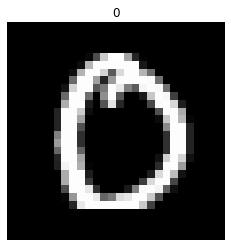

In [238]:
random_idx = np.random.randint(1000)

image = x_train[random_idx]
label = y_train[random_idx]


visualize_image(image, label)
input_layer = image.flatten()

In [239]:
_, new_output = forward_pass(input_layer, weights)
norm_new_output = np.array(tf.nn.softmax(new_output)) # transforming the logits to probs
norm_new_output

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [240]:
new_output

array([ 3902.33107464,  -372.13481598,   -84.67525204, -1102.88252475,
          71.83223788,    65.33776162, -1667.93226764,    62.59502226,
          69.65177992,    61.82283493])

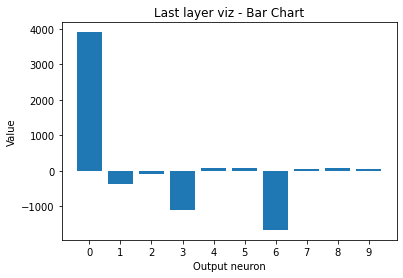

In [241]:
import matplotlib.pyplot as plt

x_indices = range(10)

plt.bar(x_indices, new_output)
plt.xlabel('Output neuron')
plt.ylabel('Value')
plt.title('Last layer viz - Bar Chart')

# Customize x-axis tick labels
plt.xticks(x_indices, x_indices)

plt.show()
